C:\Users\Utente\AppData\Local\Temp\ipykernel_5436\3575836547.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data= pd.read_csv('data.txt', skiprows=0, delim_whitespace=True)


    d(A)      V(eV)
0   0.75  24.487084
4   1.00  -6.151641
14  1.00  -6.151641
15  1.05  -7.864026
16  1.10  -8.931146
17  1.15  -9.532254
18  1.20  -9.802574
19  1.25  -9.839184
11  1.25  -9.839184
20  1.30  -9.714863
21  1.35  -9.478948
22  1.40  -9.167665
8   1.50  -8.415497
1   1.75  -6.390927
5   2.00  -4.684737
12  2.25  -4.234246
9   2.50  -3.949086
2   2.75  -3.701564
6   3.00  -3.722838
13  3.25  -3.754213
10  3.50  -3.765728
3   3.75  -3.768856
7   4.00  -3.772406


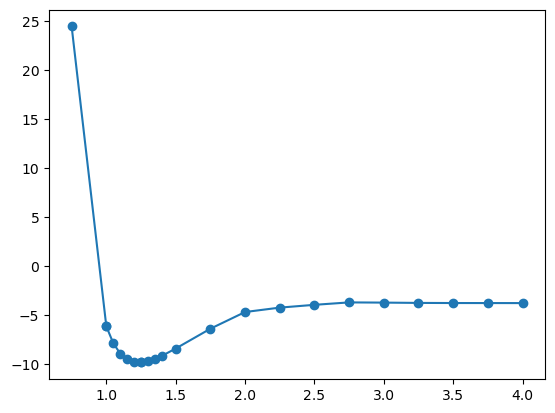

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data= pd.read_csv('data.txt', skiprows=0, delim_whitespace=True)
data.sort_values(by=data.columns[0], inplace=True)
print (data)
d= data.iloc[:,0]
E_g=data.iloc[:,1]
E_inf= E_g.iloc[-1]
plt.plot( d,  E_g, marker='o', linestyle='-')


C:\Users\Utente\AppData\Local\Temp\ipykernel_5436\2435637201.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data= pd.read_csv('data.txt', skiprows=16, delim_whitespace=True)
C:\Users\Utente\AppData\Local\Temp\ipykernel_5436\2435637201.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  fit = opt.curve_fit(parab, d.iloc[2:5], E_g.iloc[2:5], p0=[1,1,100])


   1.00  -6.15164074
0  1.05    -7.864026
1  1.10    -8.931146
2  1.15    -9.532254
3  1.20    -9.802574
4  1.25    -9.839184
5  1.30    -9.714863
6  1.35    -9.478948
7  1.40    -9.167665
Minimum at d = [1.23283255] with E_g = [-9.85296012]
Binding Energy = [-6.080554]
Fitted parameters: [  46.741684   -115.2493404    61.18860988]


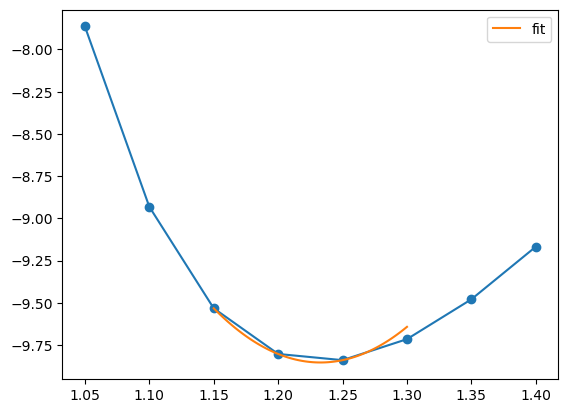

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

data= pd.read_csv('data.txt', skiprows=16, delim_whitespace=True)
data.sort_values(by=data.columns[0], inplace=True)
print (data)
d= data.iloc[:,0]
E_g=data.iloc[:,1]

def parab(x, a,b,c):
    return a*x**2 + b*x + c
fit = opt.curve_fit(parab, d.iloc[2:5], E_g.iloc[2:5], p0=[1,1,100])
popv, pcov = fit
x= np.linspace(1.15, 1.3, 100)

min= opt.minimize(parab, x0=0, args=tuple(popv))
bind_en= parab(min.x, *popv)-E_inf
print("Minimum at d =", min.x, "with E_g =", parab(min.x, *popv))
print ("Binding Energy =", bind_en)
print ("Fitted parameters:", popv)
plt.plot( d,  E_g, marker='o', linestyle='-')
plt.plot( x, parab(x, *popv), linestyle='-', label='fit')
plt.legend()
plt.show()


In [ ]:
### Calculating Harmonic frequencies ####
k = 2* popv[0] * 1.60218e-19 / (1e-10)**2  # in J/m^2
mu = (16*16)/(16+16) * 1.66054e-27  # reduced mass in kg

freq = (1/(2*np.pi)) * np.sqrt((k/(mu))) *1e-12  # in THz

print("Harmonic frequency (THz):", freq)

Harmonic frequency (THz): 53.44084244415591


C:\Users\Utente\AppData\Local\Temp\ipykernel_6724\2515412190.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data= pd.read_csv('data.txt', skiprows=28, delim_whitespace=True)


   0.85  -4.13505497
0  0.90    -8.444345
1  0.95   -11.303814
2  1.00   -13.114517
3  1.05   -14.166138
4  1.10   -14.673648
5  1.15   -14.791181
6  1.20   -14.635455
7  1.25   -14.290237
Minimum at d = [1.14800062] with E_g = [-14.80895378]
Fitted parameters: [  66.32354942 -152.27895263   72.59921276]


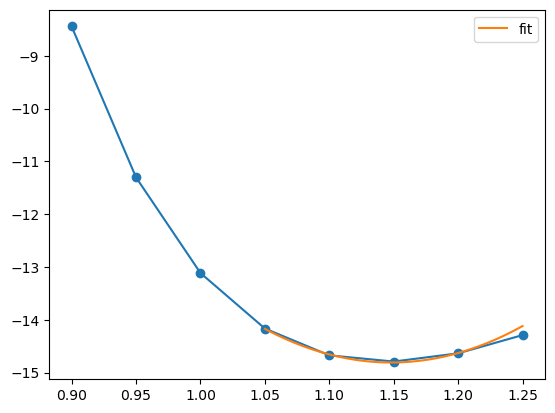

Harmonic frequency (THz): 63.658294398226595


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

data= pd.read_csv('data.txt', skiprows=28, delim_whitespace=True)

print (data)
d= data.iloc[:,0]
E_g=data.iloc[:,1]

def parab(x, a,b,c):
    return a*x**2 + b*x + c
fit = opt.curve_fit(parab, d.iloc[3:7], E_g.iloc[3:7], p0=[1,1,100])
popv, pcov = fit
d_in= d.iloc[3]
d_max = d.iloc[7]
x= np.linspace(d_in, d_max, 100)

min= opt.minimize(parab, x0=0, args=tuple(popv))
print("Minimum at d =", min.x, "with E_g =", parab(min.x, *popv))
print ("Fitted parameters:", popv)
plt.plot( d,  E_g, marker='o', linestyle='-')
plt.plot( x, parab(x, *popv), linestyle='-', label='fit')
plt.legend()
plt.show()

### Calculating Harmonic frequencies ####
k = 2* popv[0] * 1.60218e-19 / (1e-10)**2  # in J/m^2
mu = (16*16)/(16+16) * 1.66054e-27  # reduced mass in kg

freq = (1/(2*np.pi)) * np.sqrt((k/(mu))) *1e-12  # in THz

print("Harmonic frequency (THz):", freq)